# Anti-Hater Filter for Social Networks

In recent years, online content moderation has become a critical challenge for many platforms facing an increasing volume of potentially harmful comments. These comments can include insults, threats, obscene content, or hate speech. Manual moderation is ineffective at scale, and traditional algorithms often fail to capture the complexity and variety of offensive language.

**The Problem to Solve**

The company **TechTalk**, a forum for technology enthusiasts, has found that a significant number of comments posted in community threads contain hate speech and insults that compromise the quality of discussions. Users have reported that, due to its growing popularity, the platform struggles to manage the flow of harmful comments using traditional moderation tools. **TechTalk** has turned to **DeepCortex AI Solutions** to implement an automated moderation solution based on Deep Learning that can filter toxic comments in real-time.

**DeepCortex AI Solutions** has decided to develop an advanced system based on Deep Learning technologies to automate and improve the moderation process. At the heart of the project is a deep learning model featuring **recurrent layers**, designed to classify comments into multiple toxicity categories.

**Use Case**

**Real-world scenario:** Mario Rossi, community manager at TechTalk, handles the manual moderation of user-generated content daily. With the increase in platform traffic, Mario can no longer manually manage the volume of harmful comments and must find a way to automatically filter offensive, threatening, or obscene comments without slowing down the user experience.

---

**Technical Model Requirements**

* **Task:** Multi-label classification of comments into 6 categories:
1. Toxic
2. Severely Toxic
3. Obscene
4. Threat
5. Insult
6. Identity Hate


* **Dataset:** A dataset of 160,000 comments will be provided, with each comment labeled in one or more of the categories above. Comments may have zero or more active labels.
* **Architecture:** The model must include **recurrent layers** (e.g., LSTM or GRU) to handle the sequential nature of textual comments.
* **Output:** At the inference level, for each comment, the model must produce a vector of 6 elements (one for each label) with binary values (0 or 1), where 1 indicates the presence of the corresponding label and 0 its absence.

---

**Project Phases**

**1. Data Preprocessing**

* Textual comments must be converted into numerical sequences (tokenization).
* Data must be normalized and balanced to ensure all toxicity categories are represented fairly.

**2. Model Development**

* The deep learning model will be based on a recurrent architecture capable of capturing long-term dependencies between words in comments.
* Recurrent layers (LSTM or GRU) will be implemented for the multi-label classification task.

**3. Model Training**

* The dataset will be split into training, validation, and test sets.
* Advanced optimization techniques will be used to improve model convergence.

**4. Inference and Prediction**

* During inference time, for each comment, the model will return a 6-element vector of 0s or 1s, depending on the presence of toxicity in one or more of the predicted categories.

**5. Validation**

* The model will be evaluated using metrics such as **Accuracy**, **F1-score** for each category, and **Global Precision** in predicting multiple labels.

---

**Added Value**

* **Automation:** The model will significantly reduce the manual moderation workload, allowing TechTalk to handle a larger number of comments in real-time while maintaining a safe environment for users.
* **Efficiency:** By using recurrent layers, the model will better capture the context and nuances of textual comments, improving prediction accuracy compared to traditional methods.
* **Scalability:** Once implemented, the system will be easily scalable to handle growing volumes of data, adapting to the increasing number of users and comments on the platform.
* **Integration:** The solution will be integrated directly into TechTalk's commenting system, making automatic filtering immediately operational without negatively impacting user experience.

**Dataset**

The dataset can be downloaded from this link:

[Filter_Toxic_Comments_dataset.csv](https://proai-datasets.s3.eu-west-3.amazonaws.com/Filter_Toxic_Comments_dataset.csv)

## Import

In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re


## Functions

In [104]:
def plot_multi_bar(count_series, perc_series, title, figsize=(10, 6)):
    '''
    Plots a multi-bar chart with two y-axes: one for count and one for percentage.
    @param count_series: A pandas Series containing the count values for each category.
    @param perc_series: A pandas Series containing the percentage values for each category.
    @param title: The title of the plot.
    '''
    w, h = figsize
    base_font_size = min(w, h)
    title_size = base_font_size * 2
    label_size = base_font_size * 1.5
    tick_size = base_font_size * 1.2
    bar_label_size = base_font_size * 1.3
    legend_size = base_font_size * 1.5
    
    categories = count_series.index
    x = np.arange(len(categories))
    width = 0.35
    fig, ax1 = plt.subplots(figsize=figsize)

    # first axes - count
    barre1 = ax1.bar(x - width/2 - 0.05, count_series, width, 
                    label='Count', color='#3498db', edgecolor='white')

    ax1.set_ylabel('Sum', color='#3498db', fontsize=label_size, fontweight='bold')
    ax1.set_ylim(0, max(count_series)*1.2)
    ax1.tick_params(axis='y', labelcolor='#3498db', labelsize=tick_size)
    ax1.grid(axis='y', linestyle='--', alpha=0.3) 
    ax1.bar_label(barre1, padding=3, color='#3498db', fontsize=bar_label_size)

    # second axes - percentage
    ax2 = ax1.twinx()
    barre2 = ax2.bar(x + width/2 + 0.05, perc_series, width, 
                    label='Percentage', color='#e67e22', edgecolor='white')
    ax2.set_ylabel('Percentage (%)', color='#e67e22', fontsize=label_size, fontweight='bold')
    ax2.set_ylim(0, 100)
    ax2.tick_params(axis='y', labelcolor='#e67e22', labelsize=tick_size)
    ax2.bar_label(barre2, padding=3, color='#e67e22', fontsize=bar_label_size, fmt='%.2f%%')

    # legend
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', frameon=True, fontsize=legend_size)

    plt.title(title, fontsize=title_size, pad=20)
    plt.tight_layout()
    plt.show()

In [85]:
def normalize_unicode(text):
    return text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def replace_urls_emails(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+')
    return url_pattern.sub(r'url', text)

def clean_spacing(text):
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'\n+', ' ', text)  
    return text.strip() 

def base_clean(text):
    text = normalize_unicode(text)
    text = remove_html(text)
    text = replace_urls_emails(text)
    text = clean_spacing(text)
    return text

def get_number_tokens(text):
    text = base_clean(text)
    return len(text.split())

## Load Data

In [86]:
dataset_path ="https://proai-datasets.s3.eu-west-3.amazonaws.com/Filter_Toxic_Comments_dataset.csv"
dataset = pd.read_csv(dataset_path)

In [87]:
dataset.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


# EDA

In [88]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   comment_text   159571 non-null  str  
 1   toxic          159571 non-null  int64
 2   severe_toxic   159571 non-null  int64
 3   obscene        159571 non-null  int64
 4   threat         159571 non-null  int64
 5   insult         159571 non-null  int64
 6   identity_hate  159571 non-null  int64
 7   sum_injurious  159571 non-null  int64
dtypes: int64(7), str(1)
memory usage: 9.7 MB


## Labels distribution

In [89]:
count_sum_inj = dataset["sum_injurious"].value_counts()
count_perc_inj = count_sum_inj/len(dataset) * 100

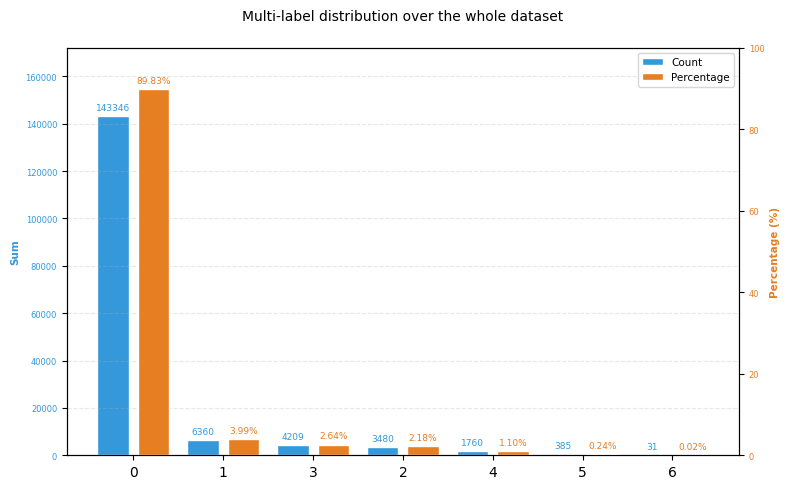

In [106]:
plot_multi_bar(count_sum_inj, 
               count_perc_inj, 
               'Multi-label distribution over the whole dataset',
               figsize=(8,5))

In [91]:
count_labels = dataset.drop(columns=['sum_injurious', 'comment_text']).sum(axis=0)
percent_labels = count_labels/len(dataset) * 100

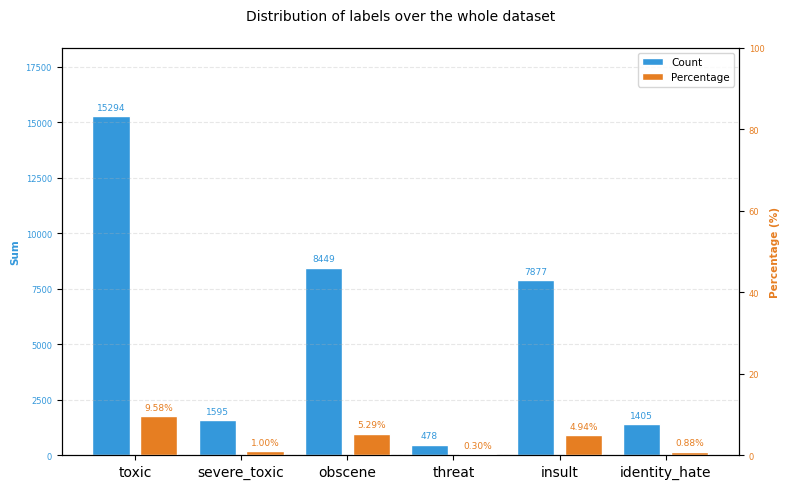

In [107]:
plot_multi_bar(count_labels, percent_labels, 
               'Distribution of labels over the whole dataset',
               figsize=(8,5))

## Co-occurence labels analysis

In [93]:
# co-occurence matrix
labels_df = dataset.drop(columns=['sum_injurious', 'comment_text'])
co_occurrence_matrix = labels_df.T.dot(labels_df)

In [94]:
# co-occurence matrix normalized on the total count of each label by column
tot_labels_count = np.diag(co_occurrence_matrix) 
cond_prob_matrix = co_occurrence_matrix.div(tot_labels_count, axis=1)

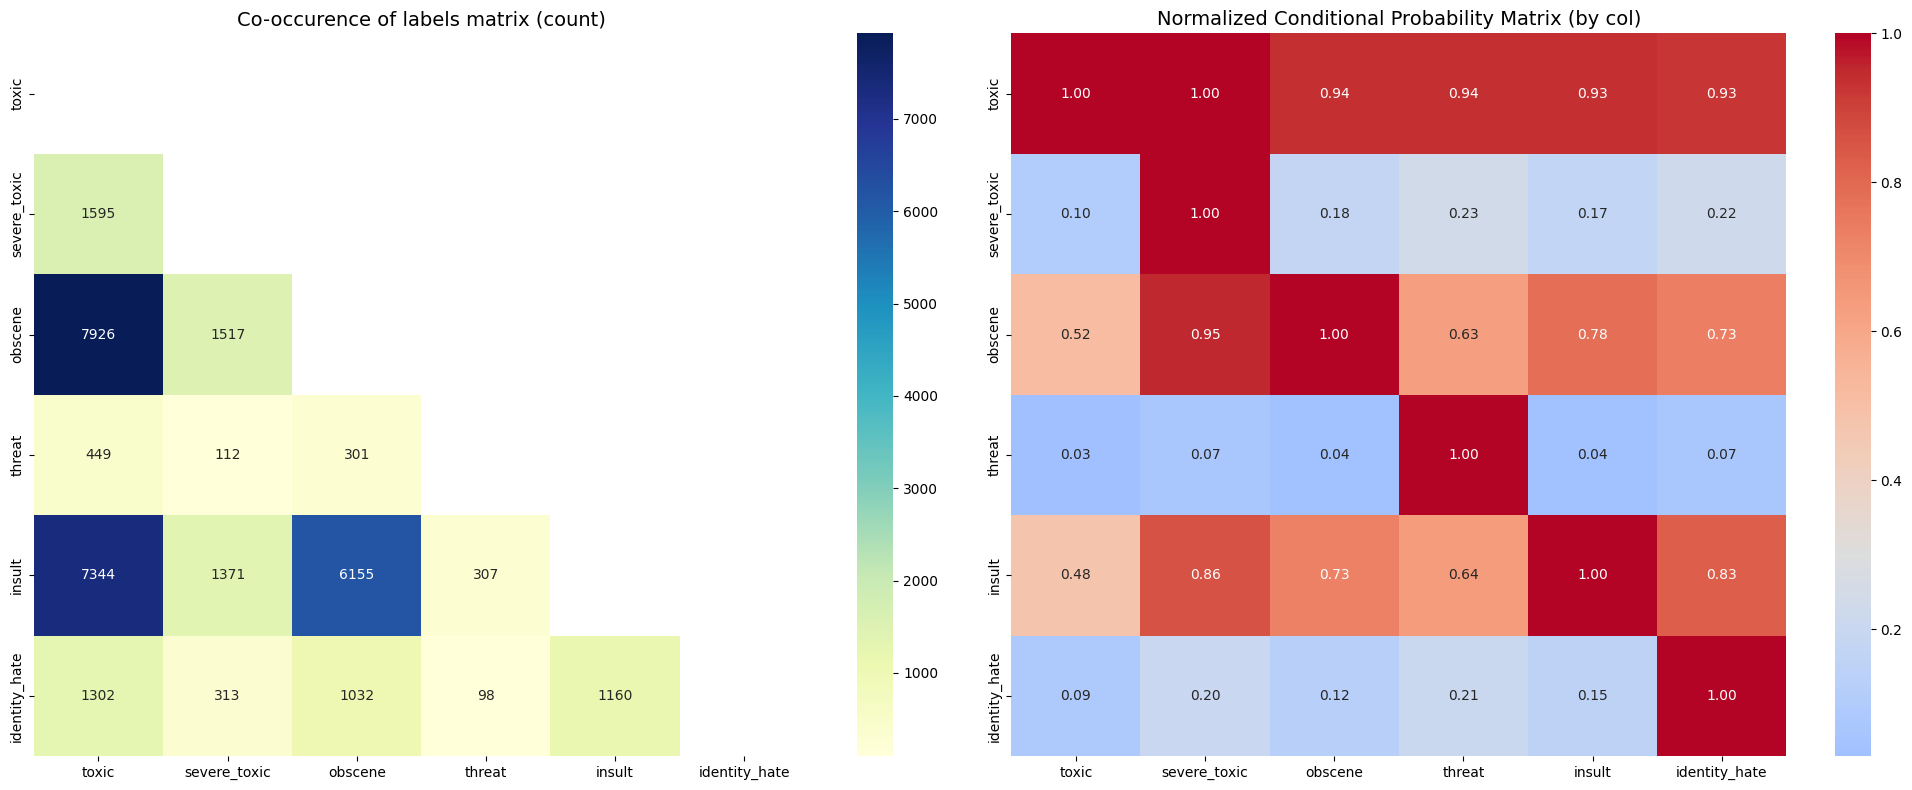

In [95]:
# plots co-occurence of labels
mask = np.triu(np.ones_like(co_occurrence_matrix, dtype=bool))
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu', mask=mask, )
plt.title('Co-occurence of labels matrix (count)', fontsize=14)

plt.subplot(1,2,2)
sns.heatmap(cond_prob_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0.3)
plt.title('Normalized Conditional Probability Matrix (by col)', fontsize=14)

plt.tight_layout()
plt.show();

💡 **Observation**

- **IMBALANCE**: Most of the comments ($89 \%$) in the dataset have no hate label, so we have non hate-hate comment ratio of $8,9$.
- The *sum_injurious* feature explain the information about how many labels are true for the record $[0;6]$
- The most common label in the hate comments is *toxic* (in almost all hate comments), followed by *obscene* and *insult*. The labels *severe_toxic*, *threat* and *identity_hate* have less than $1%$ of representation in the dataset.

We can see from the heatmap (especially from the normalized one) how the labels appear in co-occurence:
- almost all hate comments are labeled *toxic*, so every other label has a very high co-occurence probability with that label (all over 93%)
- comments *toxic*: 48% are also *insult* and 52% are also *obscene*
- comments *severe_toxic*: 86% are also *insult* and 95% are also *obscene*
- comments *obscene*: 73% are also *insult*
- comments *threat*: 74% are also *insult* and 63% are also *obscene*
- comments *insult*: 78% are also *obscene* 
- comments *identity_hate*: 83% are also *insult* and 73% are also *obscene*

## Length Analysis 

In [109]:
dataset['text_char_length'] = dataset['comment_text'].apply(lambda x: len(str(x)))

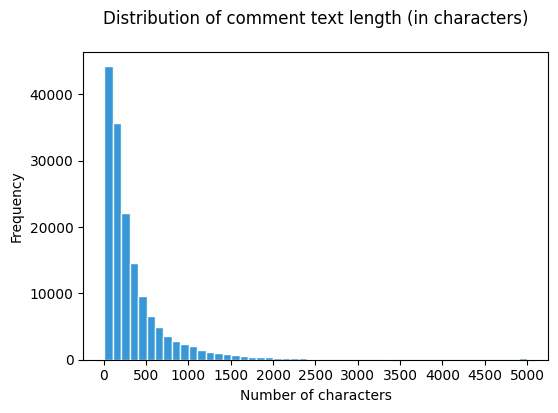

In [110]:
# Plot distribution of comment text length in characters
dataset['text_char_length'].plot(kind="hist", bins=50, figsize=(6, 4), color="#3498db", edgecolor='white')
plt.title('Distribution of comment text length (in characters)', pad=20)
plt.xticks(np.arange(0, dataset['text_char_length'].max()+1, 500))
plt.xlabel('Number of characters')
plt.show()

In [112]:
# apply simple tokenization for length analysis
dataset['tokens_number'] = dataset['comment_text'].apply(get_number_tokens)

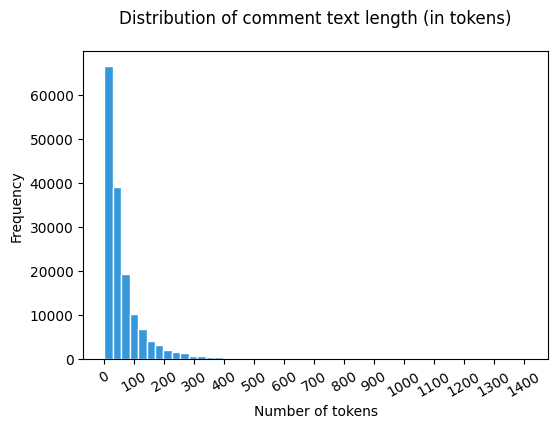

In [114]:
# Plot distribution of comment text length in tokens
dataset['tokens_number'].plot(kind="hist", bins=50, figsize=(6, 4), color="#3498db", edgecolor='white')
plt.title('Distribution of comment text length (in tokens)', pad=20)
plt.xticks(np.arange(0, dataset['tokens_number'].max()+1, 100), rotation=30)
plt.xlabel('Number of tokens')
plt.show()

In [ ]:
# % of comments over 1000 characters and over 200 tokens
len_over_k_char = dataset[dataset['text_char_length'] > 1000].shape[0]
len_over_k_tokens = dataset[dataset['tokens_number'] > 200].shape[0]
print(f"Number of comments with more than 1000 characters: {len_over_k_char/dataset.shape[0]*100:.2f}%")
print(f"Number of comments with more than 200 tokens: {len_over_k_tokens/dataset.shape[0]*100:.2f}%")

Number of comments with more than 1000 characters: 8.37%
Number of comments with more than 200 tokens: 6.32%


In [ ]:
# stats distribution of comments' length 
dataset[['text_char_length', 'tokens_number']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
text_char_length,159571.0,394.073221,590.720282,6.0,96.0,205.0,435.0,5000.0
tokens_number,159571.0,67.267229,99.208728,0.0,17.0,36.0,75.0,1411.0


💡 **Observation**

- The average length of the comment text is *394 characters* and *67 tokens*
- 50% of the comments have less than *205 characters* and *36 tokens*
- 75% of the comments have les than *435 characters* and *75 tokens*
- There are also some longer comments:
    - with over 1000 characters only 8%
    - with over 200 tokens 6%

To better capture the semantic meaning and relationship of the text we will select models and algorithms that works well with short texts.

# Preprocess

# Models

## Benchmarck 

Logistic Regression multi-label

## RNN Models

- Bidirectional to better capture the context
- Consider Attention mechanism
- Embedding
- Output Layer -> Dense with sigmoid (for the multi-label, not softmax)  